In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('spam.csv')

In [4]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [6]:
import seaborn as sns

<Axes: xlabel='Category', ylabel='count'>

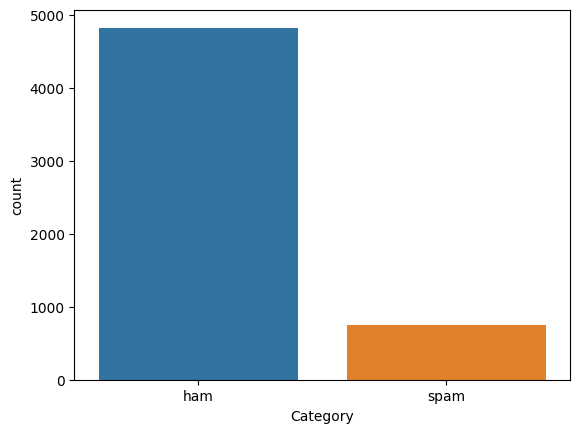

In [8]:
sns.countplot(x='Category',data =df)

In [10]:
df['spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)
df

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(df.Message,df.spam,test_size=.25,random_state=42)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
v = CountVectorizer()

In [28]:
x_train_count = v.fit_transform(xtrain.values)
x_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
from sklearn.naive_bayes import MultinomialNB

In [30]:
model = MultinomialNB()

In [31]:
model.fit(x_train_count,ytrain)

MultinomialNB()

In [33]:
emails =[
    'hey mohan, can we get together to watch football game?',
    'upto 20% discount on parking, exclusive offer just for you, dont miss this rewards!'
]
emails_count = v.fit_transform(emails)
model.predict(emails_count)

ValueError: X has 24 features, but MultinomialNB is expecting 7489 features as input.

In [34]:
x_test_count = v.fit_transform(xtest)

In [35]:
model.score(x_test_count,ytest)

ValueError: X has 3981 features, but MultinomialNB is expecting 7489 features as input.